In [1]:
import pandas as pd #
import numpy as np #
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
filepath='cleaned_data.csv'
data=pd.read_csv(filepath,infer_datetime_format=True)
data.head()

,Unnamed: 0,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Date,Acres,Lot_sqft,Liv_index
0,0,A,98001,Auburn,725000,4.0,3.0,0.00,3060,2021-05-26,0.227,9894.0,68.0
1,1,A,98001,Auburn,300000,4.0,2.0,1.00,920,2021-05-26,0.164,7150.0,68.0
2,2,S,98001,Auburn,555000,3.0,2.0,1.00,1196,2021-05-07,0.544,23689.0,68.0
3,3,A,98001,Auburn,1300000,220.0,4.0,1.75,2850,2020-10-22,6.000,261360.0,68.0
4,4,S,98001,Auburn,250000,46.0,2.0,1.50,1200,2021-05-20,0.220,9600.0,68.0


In [3]:
clean=data.copy()
clean.drop(columns=['Unnamed: 0','Status','Days_on_market','Date','Acres'], inplace=True) #'City',,'ZipCode'
clean.head()

,ZipCode,City,Price,Beds,Baths,Sqft,Lot_sqft,Liv_index
0,98001,Auburn,725000,3.0,0.00,3060,9894.0,68.0
1,98001,Auburn,300000,2.0,1.00,920,7150.0,68.0
2,98001,Auburn,555000,2.0,1.00,1196,23689.0,68.0
3,98001,Auburn,1300000,4.0,1.75,2850,261360.0,68.0
4,98001,Auburn,250000,2.0,1.50,1200,9600.0,68.0


In [4]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ZipCode    4128 non-null   int64  
 1   City       4128 non-null   object 
 2   Price      4128 non-null   int64  
 3   Beds       4128 non-null   float64
 4   Baths      4128 non-null   float64
 5   Sqft       4128 non-null   int64  
 6   Lot_sqft   4128 non-null   float64
 7   Liv_index  4128 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 258.1+ KB


In [5]:
clean['Liv_index']=clean['Liv_index'].astype(int) # Cahnged the dtype for Zipcode from float to int
clean['Liv_index'].dtype

dtype('int32')

In [6]:
clean.groupby(['City', 'ZipCode']).agg(['min','max'])

Price          Beds      Baths        Sqft         \
                          min      max  min  max   min   max   min    max   
City         ZipCode                                                        
Algona       98001     280000   529950  2.0  4.0  0.75  3.00   820   1965   
             98047     417000   417000  2.0  2.0  1.00  1.00   870    870   
Auburn       98001     250000  2450000  2.0  6.0  0.00  5.00   920   8900   
             98002     300000   690000  0.0  5.0  0.00  3.25   620   3510   
             98092     220000  2400000  0.0  6.0  0.00  5.00   820   6910   
...                       ...      ...  ...  ...   ...   ...   ...    ...   
Tukwila      98188     335000   795000  2.0  5.0  1.50  4.00   960   3270   
Vashon       98070     385000  3200000  1.0  4.0  1.00  4.50   820   5000   
Woodinville  98072     580000  8500000  2.0  6.0  1.00  5.00  1250  10986   
             98077     750000  3095000  3.0  8.0  1.50  4.75  1330   6900   
Yarrow Point 98004    2350000  3775000  3.0  5.0  2.50  4.75  2970   6570   

                     Lot_sqft            Liv_index      
                          min        max       min max  
City         ZipCode                                    
Algona       98001     4500.0    16000.0        68  68  
             98047    17032.0    17032.0        68  68  
Auburn       98001     4500.0   265280.0        68  68  
             98002     1679.0    30273.0        68  68  
             98092        1.0  1576001.0        68  68  
...                       ...        ...       ...  ..  
Tukwila      98188     6635.0    29065.0        59  59  
Vashon       98070     1164.0   443961.0        79  79  
Woodinville  98072     3243.0  2664836.0        83  83  
             98077     9750.0   322488.0        83  83  
Yarrow Point 98004    12072.0    13416.0        85  85  

[108 rows x 12 columns]

In [7]:
#Grouped by City and then Liv_index to see the count. Both City and Liv_index represent same values.Whereas a city can have many Zipcodes 
clean.groupby(['City','Liv_index']).count() 

,,ZipCode,Price,Beds,Baths,Sqft,Lot_sqft
City,Liv_index,,,,,,
Algona,68,9,9,9,9,9,9
Auburn,68,163,163,163,163,163,163
Beaux Arts,77,1,1,1,1,1,1
Bellevue,83,172,172,172,172,172,172
Black Diamond,71,60,60,60,60,60,60
Bothell,79,50,50,50,50,50,50
Burien,66,73,73,73,73,73,73
Carnation,77,26,26,26,26,26,26
Clyde Hill,83,5,5,5,5,5,5


In [8]:
pd.unique(clean['Liv_index'])

array([68, 63, 81, 85, 84, 64, 79, 71, 83, 78, 74, 80, 69, 77, 82, 86, 66,
       67, 59])

In [15]:
# So we can drop zipcode
# clean1=clean.drop(columns=['ZipCode'])
clean1=clean.copy()

In [16]:
clean1.groupby(['City']).agg(['min','max'])

ZipCode           Price           Beds       Baths         \
                     min    max      min       max  min   max   min    max   
City                                                                         
Algona             98001  98047   280000    529950  2.0   4.0  0.75   3.00   
Auburn             98001  98092   220000   2450000  0.0   6.0  0.00   5.00   
Beaux Arts         98004  98004  3380000   3380000  3.0   3.0  2.75   2.75   
Bellevue           98004  98008   640000  13998000  0.0  13.0  0.00   9.25   
Black Diamond      98010  98010   170000   2950000  1.0   5.0  0.00   4.75   
Bothell            98011  98028   323000   1850000  2.0   6.0  1.75   5.00   
Burien             98146  98168   390000   3395000  1.0   6.0  1.00   5.50   
Carnation          98014  98014   352500   2940000  2.0   6.0  1.00   4.00   
Clyde Hill         98004  98004  3000000   5800000  4.0   6.0  3.00   6.75   
Covington          98042  98042   340000   1550000  0.0   5.0  0.00   4.25   
Des Moines         98003  98198   350000   1698000  0.0   5.0  0.00   3.00   
Duvall             98019  98019   674995   1649000  3.0   5.0  1.75   3.75   
Enumclaw           98022  98022   340000   2900000  1.0   5.0  0.75   4.50   
Fall City          98024  98024   575000   2210000  2.0   5.0  1.00   3.50   
Federal Way        98001  98023   195000   2300000  0.0   6.0  0.00   5.50   
Hobart             98025  98025  1495000   1495000  3.0   3.0  1.50   1.50   
Issaquah           98027  98050   425000  11998000  2.0   7.0  1.00   7.00   
Kenmore            98020  98028   560000   1988000  2.0   6.0  1.00   4.50   
Kent               98030  98042   232000   1600000  2.0   8.0  1.00   5.25   
Kirkland           98033  98034   500000  10700000  0.0   6.0  0.00   5.50   
Lake Forest Park   98115  98155   558000   2700000  3.0  10.0  1.00   4.75   
Maple Valley       98038  98038   360000   4200000  1.0   6.0  1.00   4.50   
Medina             98039  98039  1902000  22500000  3.0   7.0  0.00   7.00   
Mercer Island      98040  98040  1165000  17800000  3.0   5.0  1.25   8.50   
Newcastle          98056  98059   700000   2415000  3.0   5.0  1.75   4.25   
Normandy Park      98166  98198   490000   1650000  2.0   5.0  1.00   4.75   
North Bend         98045  98045   279000   5899000  1.0   6.0  1.00   6.50   
Pacific            98047  98047   310000    775000  2.0   5.0  1.00   3.00   
Preston            98050  98050   526650   1860000  1.0   4.0  1.50   3.25   
Ravensdale         98051  98051   505000   1925000  3.0   5.0  1.75   4.00   
Redmond            98033  98053   480000   7950000  1.0   7.0  1.00   8.25   
Renton             98055  98059   380000   4200000  1.0   6.0  0.75   5.00   
Sammamish          98029  98075   699000   6288000  0.0   6.0  0.00   7.75   
SeaTac             98168  98198   260000   1295000  1.0   5.0  1.00   3.50   
Seattle            98013  98199   139000  27500000  0.0  11.0  0.00  11.70   
Shoreline          98026  98177   479000   4350000  2.0   7.0  0.75   9.25   
Snoqualmie         98065  98065   459000   1800000  2.0   5.0  1.00   5.50   
Tukwila            98168  98188   335000    825000  2.0   5.0  1.00   4.00   
Vashon             98070  98070   385000   3200000  1.0   4.0  1.00   4.50   
Woodinville        98072  98077   580000   8500000  2.0   8.0  1.00   5.00   
Yarrow Point       98004  98004  2350000   3775000  3.0   5.0  2.50   4.75   

                  Sqft          Lot_sqft            Liv_index      
                   min    max        min        max       min max  
City                                                               
Algona             820   1965     4500.0    17032.0        68  68  
Auburn             620   8900        1.0  1576001.0        68  68  
Beaux Arts        3390   3390    15630.0    15630.0        77  77  
Bellevue           910  15360        1.0   436598.0        83  83  
Black Diamond      660   7430     2252.0   226512.0        71  71  
Bothell           1150   4090     3320.0

In [25]:
# reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

homes_over_1mil=clean1.loc[(clean1.Price > 1000000) & (clean1.Sqft > 5000)]

In [30]:
homes_under_1mil=clean.loc[(clean1.Price <1000000) ]

In [31]:
homes_under_1mil

,ZipCode,City,Price,Beds,Baths,Sqft,Lot_sqft,Liv_index
0,98001,Auburn,725000,3.0,0.00,3060,9894.0,68
1,98001,Auburn,300000,2.0,1.00,920,7150.0,68
2,98001,Auburn,555000,2.0,1.00,1196,23689.0,68
4,98001,Auburn,250000,2.0,1.50,1200,9600.0,68
5,98001,Auburn,424950,3.0,2.00,1620,6401.0,68
...,...,...,...,...,...,...,...,...
4086,98033,Kirkland,750000,3.0,1.50,1100,9600.0,81
4087,98033,Kirkland,899000,3.0,1.75,1380,12040.0,81
4089,98033,Kirkland,975000,3.0,1.75,1480,2185.0,81
4097,98033,Kirkland,950000,3.0,2.50,2115,79296.0,81


In [39]:
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

## Model for homes under $ 1 million.

In [177]:
# Model Random Forest Regrssor

X=homes_under_1mil.copy()

X=X.drop(columns = ['Price','City'])


In [178]:
X.head()

,ZipCode,Beds,Baths,Sqft,Lot_sqft,Liv_index
0,98001,3.0,0.0,3060,9894.0,68
1,98001,2.0,1.0,920,7150.0,68
2,98001,2.0,1.0,1196,23689.0,68
4,98001,2.0,1.5,1200,9600.0,68
5,98001,3.0,2.0,1620,6401.0,68


In [179]:
y=homes_under_1mil['Price']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

In [181]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_squared_error
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 10556856365.68482
MAE: 77691.40255442177


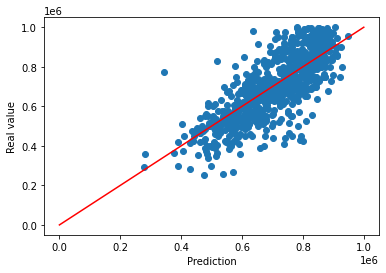

In [182]:
# Build a plot
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')
# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [183]:
df_under_1mil_rf = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})

# df2.shape

# df_under_1mil_rf['Diff']=round((df_under_1mil_rf.Actual-df_under_1mil_rf.Predicted),0)
df_under_1mil_rf.head()

,Actual,Predicted
0,750000,800598.750
1,754950,684748.260
2,800000,856699.515
3,639950,627064.900
4,715000,611215.380


<AxesSubplot:>

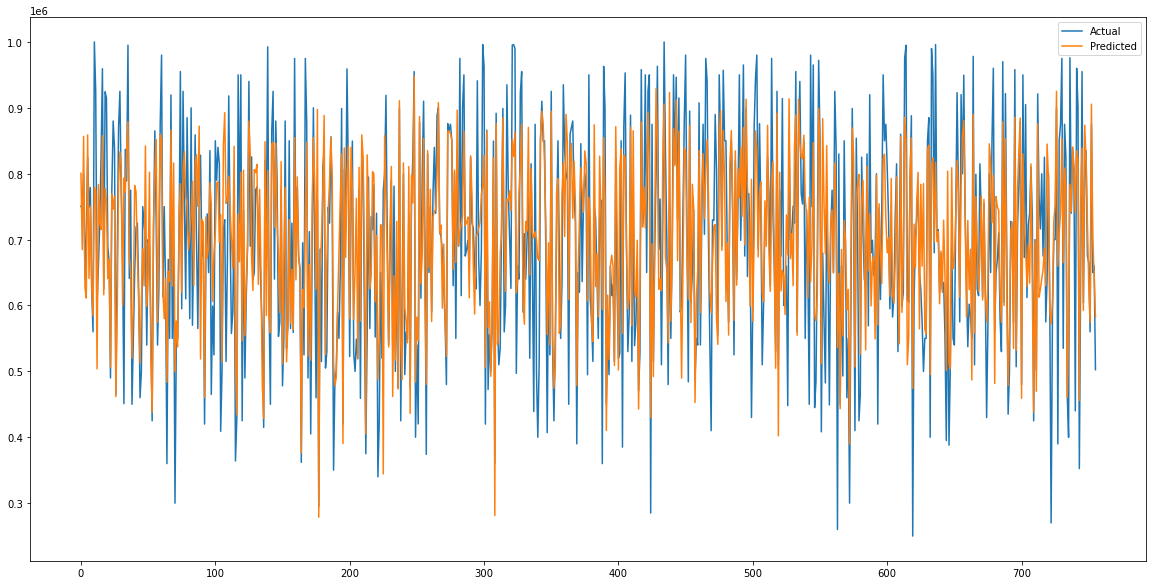

In [184]:
df_under_1mil_rf.plot(subplots=False,figsize =(20,10))

In [185]:
df_under_1mil_rf.Diff.plot(kind='line')

AttributeError: 'DataFrame' object has no attribute 'Diff'

In [48]:
print(df_under_1mil_rf.Diff.std())
print(df_under_1mil_rf.corr())

100264.96924690278
             Actual  Predicted      Diff
Actual     1.000000   0.788905  0.620662
Predicted  0.788905   1.000000  0.007816
Diff       0.620662   0.007816  1.000000


In [ ]:
X=homes_under_1mil.copy()
X=X.drop(columns = ['Price','City'])
y=homes_under_1mil['Price']


### Linear Regression Model

Model: ['ZipCode' 'Beds' 'Baths' 'Sqft' 'Lot_sqft' 'Liv_index']
Linear Regression accuracy: 22.898062087976456
coefficients : [40242.37316205 -8615.96860591 27630.29251405 63061.04871478
  -245.87132762 29982.32247722]
intercept : 701379.5796937037
      Actual      Predicted
1779  750000  660955.289342
2035  754950  633073.008372
1275  800000  811072.761060
2633  639950  655602.443857
883   715000  674085.256949
2076  825000  668682.320454
850   749000  648777.188693
1725  779000  684220.722744
3720  625000  692508.478818
3319  560000  744291.122418
3524  999999  747397.062627
2050  925000  630866.367399
3695  600000  604816.868866
2677  659950  679556.429683
1552  725000  677711.165525
3362  827000  780309.259731
3364  959330  711138.481833
3969  625000  671038.561432
2754  924300  712584.522213
2593  915000  701840.932055
1961  689900  640496.008411
2356  665000  587699.544044
3640  490000  673551.850154
2913  775000  668378.402703
915   880000  831390.281358


<AxesSubplot:>

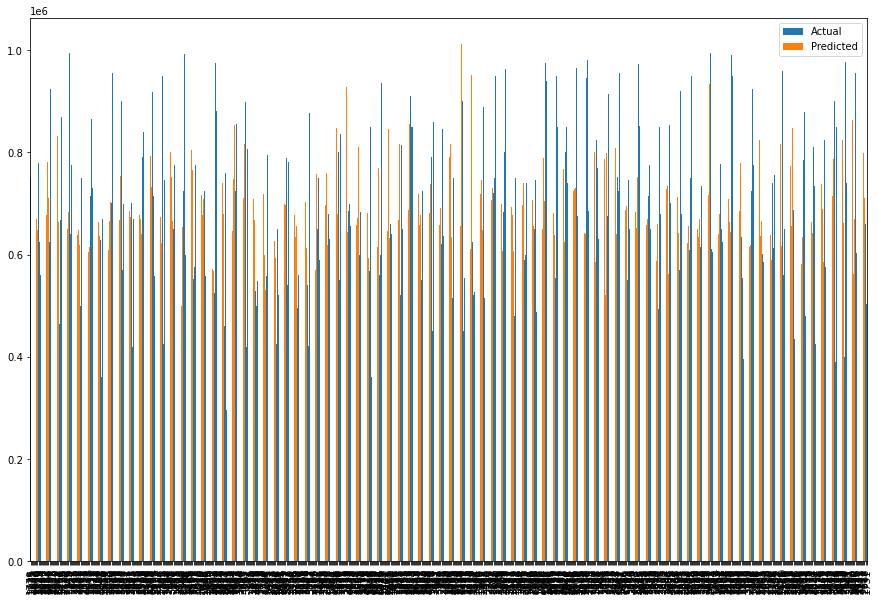

In [176]:
# Linear model for under $1 million homes. X all variables except Price and Price as y. 

X=homes_under_1mil.copy()
X=X.drop(columns = ['Price','City'])
y=homes_under_1mil['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

# Model

model=LinearRegression()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(f'Model: {X.columns.values}')
print(f'Linear Regression accuracy: {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

y_pred_lr = model.predict(X_test)
df_under_1mil_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
# df_under_1mil_linear.sort_values(by='Actual',inplace=True)

# df_under_1mil_linear = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})

# # df2.shape

# df_under_1mil_linear['Diff']=round((df_under_1mil_linear.Actual-df_under_1mil_linear.Predicted),0)
print(df_under_1mil_linear.head(25))

df_under_1mil_linear.plot(kind='bar',figsize=(15,10))



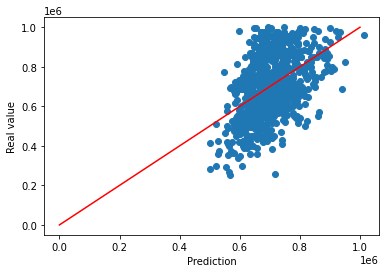

In [162]:
# Build a plot
import matplotlib.pyplot as plt

plt.scatter(df_under_1mil_linear.Predicted, df_under_1mil_linear.Actual)
plt.xlabel('Prediction')
plt.ylabel('Real value')
# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

### Model for homes over $ 1 million.

MSE: 7910794159046.783
MAE: 1890986.3023076924


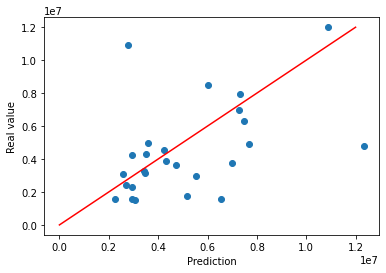

      Actual     Predicted
21   4980000  3.570364e+06
13   4900000  7.663835e+06
18   4270000  2.944077e+06
10  10950000  2.762111e+06
2    6288000  7.458690e+06
25   3175000  3.477455e+06
5    1749999  5.175621e+06
3    4790000  1.233089e+07
23   1560000  6.539957e+06
8    7950000  7.319476e+06


<AxesSubplot:>

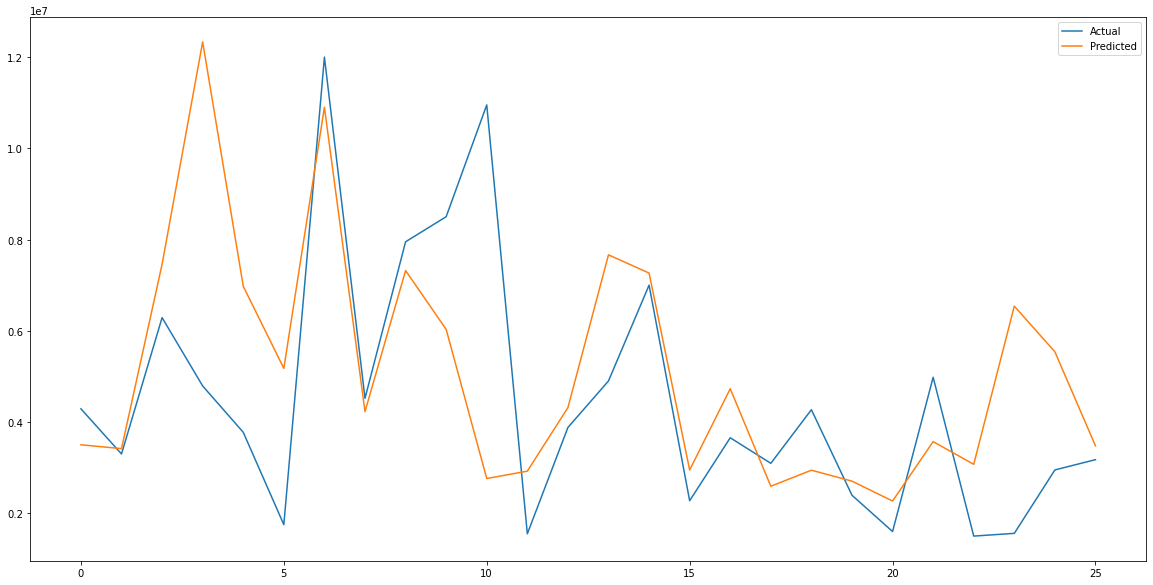

In [166]:
# Model Random Forest Regrssor

X=homes_over_1mil.copy()

X=X.drop(columns = ['Price','City'])
y=homes_over_1mil['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_squared_error
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Build a plot
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')
# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

df_over_1mil_rf = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})

# df2.shape

# df_under_1mil_rf['Diff']=round((df_under_1mil_rf.Actual-df_under_1mil_rf.Predicted),0)
print(df_over_1mil_rf.sample(10))

df_over_1mil_rf.plot(subplots=False,figsize =(20,10))

Model: ['Beds' 'Baths' 'Sqft']
Linear Regression accuracy: 15.963085534797994
coefficients : [-1413599.79069935  1057090.39899556  2235486.50116188]
intercept : 5327913.06741573
        Actual     Predicted
3825   4290000  4.436125e+06
2808   3299999  3.732559e+06
1212   6288000  7.481819e+06
1213   4790000  1.270493e+07
731    3775000  5.018803e+06
3673   1749999  5.332771e+06
3826  11998000  9.689376e+06
753    4520000  3.029460e+06
723    7950000  8.002919e+06
1150   8500000  8.589790e+06
3000  10950000  5.703445e+06
2716   1550000  2.555788e+06
124    3880000  3.059168e+06
1461   4900000  5.323807e+06
2516   7000000  6.797685e+06
1140   2275000  3.348153e+06
1039   3655000  4.938567e+06
1305   3095000  5.763522e+06
2018   4270000  3.722713e+06
2971   2395000  3.282690e+06
3993   1600000  2.696501e+06
109    4980000  4.799155e+06
1199   1500000  3.734060e+06
3434   1560000  3.057463e+06
3035   2950000  6.426570e+06


<AxesSubplot:>

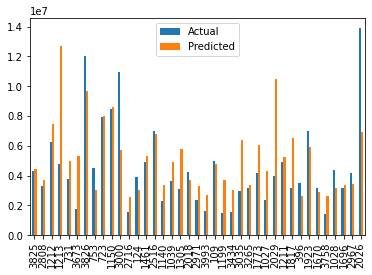

In [174]:
# Linear model for under $1 million homes. X all variables except Price and Price as y. 

X=homes_over_1mil.copy()
X=X.drop(columns = ['Price','City','Liv_index','ZipCode','Lot_sqft'])
y=homes_over_1mil['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

# Model

model=LinearRegression()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(f'Model: {X.columns.values}')
print(f'Linear Regression accuracy: {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

y_pred_lr1 = model.predict(X_test)
df_over_1mil_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr1})
# df_under_1mil_linear.sort_values(by='Actual',inplace=True)

# df_under_1mil_linear = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})

# # df2.shape

# df_under_1mil_linear['Diff']=round((df_under_1mil_linear.Actual-df_under_1mil_linear.Predicted),0)
print(df_over_1mil_linear.head(25))

df_over_1mil_linear.plot(kind='bar')

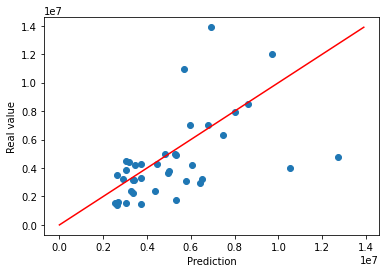

In [175]:
# Build a plot
import matplotlib.pyplot as plt

plt.scatter(df_over_1mil_linear.Predicted, df_over_1mil_linear.Actual)
plt.xlabel('Prediction')
plt.ylabel('Actual')
# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()